In [ ]:
%sudo apt-get install libjxl-tools

In [26]:
import os
import subprocess
import matplotlib.pyplot as plt

In [24]:
def encode_jxl_to_max_filesize(png_path,jxl_path,size):
    last_q = 0
    for q in range(50,100):
        subprocess.call(['cjxl', png_path, jxl_path, '-q', str(q)])
        if os.path.getsize(jxl_path) < size:
            last_q = q
        #os.remove(jxl_path)
    subprocess.call(['cjxl', png_path, jxl_path, '-q', str(last_q)])
    return last_q

JPEG XL encoder v0.7.0 [AVX2,SSE4,SSSE3,Unknown]
./lib/extras/dec/color_hints.cc:54: No color_space/icc_pathname given, assuming sRGB
Read 1020x702 image, 1399378 bytes, 99.8 MP/s
Encoding [VarDCT, d4.600, effort: 7], 
Compressed to 55438 bytes (0.619 bpp).
1020 x 702, 7.60 MP/s [7.60, 7.60], 1 reps, 8 threads.
JPEG XL encoder v0.7.0 [AVX2,SSE4,SSSE3,Unknown]
./lib/extras/dec/color_hints.cc:54: No color_space/icc_pathname given, assuming sRGB
Read 1020x702 image, 1399378 bytes, 121.3 MP/s
Encoding [VarDCT, d4.510, effort: 7], 
Compressed to 56253 bytes (0.628 bpp).
1020 x 702, 6.31 MP/s [6.31, 6.31], 1 reps, 8 threads.
JPEG XL encoder v0.7.0 [AVX2,SSE4,SSSE3,Unknown]
./lib/extras/dec/color_hints.cc:54: No color_space/icc_pathname given, assuming sRGB
Read 1020x702 image, 1399378 bytes, 106.3 MP/s
Encoding [VarDCT, d4.420, effort: 7], 
Compressed to 59042 bytes (0.660 bpp).
1020 x 702, 8.66 MP/s [8.66, 8.66], 1 reps, 8 threads.
JPEG XL encoder v0.7.0 [AVX2,SSE4,SSSE3,Unknown]
./lib/extr

png image size: 1399378 bytes
jpgxl image size: 268959 bytes
compression ratio: 5.202941712305593
used quality: 95


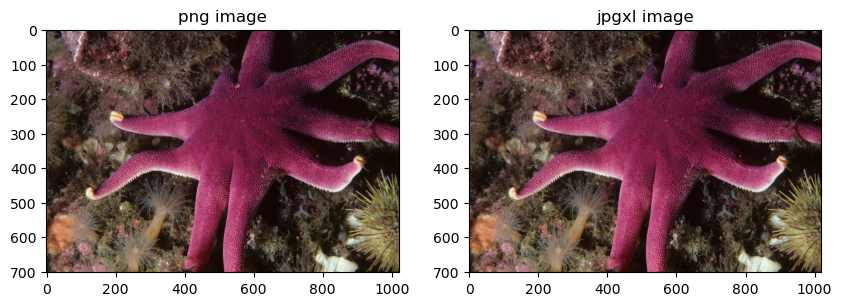

In [31]:
import os
import subprocess
import matplotlib.pyplot as plt
import imagecodecs as ic

# read png image size

# Path: fis_jpegxl.ipynb

#image path
png_image_path = 'data/DIV2K_train_LR_bicubic/X2/'
jpgxl_image_path = 'data/DIV2K_train_LR_bicubic/JPEGXL/'

#image name
image_name = '0001x2'
png_image_name = image_name + '.png'
jxl_image_name = image_name + '.jxl'

#image size
png_image_size = os.path.getsize(png_image_path + png_image_name)

#encode image with jpegxl
used_q = encode_jxl_to_max_filesize(png_image_path + png_image_name, jpgxl_image_path + jxl_image_name, png_image_size/5)

#read jpegxl image size
jpgxl_image_size = os.path.getsize(jpgxl_image_path + jxl_image_name)

#print size
print('png image size: ' + str(png_image_size) + ' bytes')
print('jpgxl image size: ' + str(jpgxl_image_size) + ' bytes')
print('compression ratio: ' + str(png_image_size/jpgxl_image_size))
print('used quality: ' + str(used_q))

#plot png vs jpgxl image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#read png image
png_image = ic.imread(png_image_path + png_image_name)
ax[0].imshow(png_image)
ax[0].set_title('png image')

#read jpgxl image
jpgxl_image = ic.imread(jpgxl_image_path + jxl_image_name)
ax[1].imshow(jpgxl_image)
ax[1].set_title('jpgxl image')


#show plot
plt.show()